In [1]:
from PrisonersDilemma import PrisonersDilemma
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Using the code

In [2]:
pi = math.pi

# Creating an instance of the game
game = PrisonersDilemma()

game.setJ(0) # 0 - Independent qubits, pi/2 - fully entangled qubits

# To cooperate - (0,0)
# To defect - (pi, 0)
game.setAliceMove(0,0)
game.setBobMove(pi,0)

(alice, bob) = game.expectedPayoff()

print("\nExpected payoff:")
print("    For Alice = ", alice)
print("    For Bob = ", bob, "\n")


Expected payoff:
    For Alice =  1.1248198369963932e-32
    For Bob =  5.0 



# Testing the 'Miracle Move'

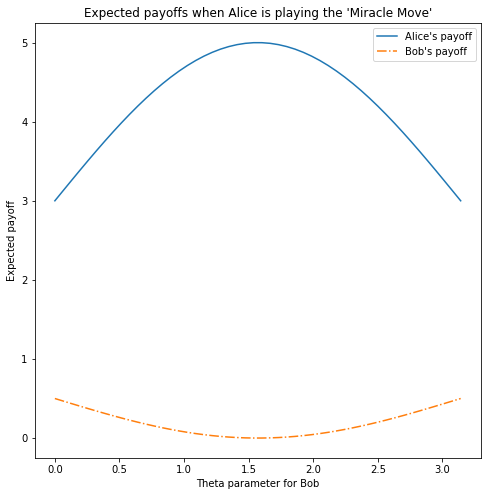

In [3]:
# Create full entanglement between qubits
game.setJ(pi/2)

# Alice plays miracle move
game.setAliceMove(pi/2,pi/2)

X = np.linspace(0, pi, 50)
Alice = np.empty(len(X))
Bob = np.empty(len(X))

# Finding Alice's and Bob's expected payoffs for different 
# 'classical' moves made by Bob
for i in range(len(X)):
	theta = X[i]
    
    # Bob plays classical moves, 
    # as indicated by the second parameter being 0
	game.setBobMove(theta, 0)
    
	(alice, bob) = game.expectedPayoff()
	Alice[i] = alice
	Bob[i] = bob

# Plotting the graph
plt.figure(figsize=(8,8))
plt.plot(X, Alice, '-', label="Alice's payoff")
plt.plot(X, Bob, '-.', label="Bob's payoff")
plt.legend()
plt.xlabel("Theta parameter for Bob")
plt.ylabel("Expected payoff")
plt.title("Expected payoffs when Alice is playing the 'Miracle Move'")
plt.show()

## Conclusions

In [1], the authors stated that when Alice is playing the 'Miracle Move' and if Bob is restricted to classical moves, Alice will recieve a reward of at least 3, and Bob at most 1/2, irrespective of the move chosen by Bob. This claim is shown to be correct in the above graph.

There was a negative sign missing from the defenition of the matrix J (which creates entanglement between the qubits) in [1], as reported in [2]. In the absence of this negative sign, both the graphs seen in the above plot will be flipped along the horizontal in such a way that they coincide at theta = pi/2, with an expected payoff value of 1 (which I've verified). Hence it is clear that this typographical error is what led the authors of [3] to conclude that the claims made in [1] were false ([2] was published after [3]).

## References
[1] Eisert, J., Wilkens, M., & Lewenstein, M. (1999). Quantum games and quantum strategies. Physical Review Letters, 83(15), 3077–3080. https://doi.org/10.1103/PhysRevLett.83.3077

[2] Eisert, J., Wilkens, M., & Lewenstein, M. (2020). Erratum: Quantum Games and Quantum Strategies (Physical Review Letters (1999) 83 (3077) DOI: 10.1103/PhysRevLett.83.3077). Physical Review Letters, 124(13), 139901. https://doi.org/10.1103/PhysRevLett.124.139901

[3] Bordg, A., & He, Y. (2019). Comment on “Quantum Games and Quantum Strategies.” ArXiv. https://arxiv.org/abs/1911.09354v1

# Recreating plots from [1]

In [4]:
from mpl_toolkits import mplot3d

newGame = PrisonersDilemma()

t_A = np.linspace(-1, 1, 101)
t_B = np.linspace(-1, 1, 101)

# Parameterization as mentioned in [1]
def plotGen(t_a, t_b):
    # For Alice
    if t_a < 0:
        newGame.setAliceMove(0, -t_a*pi/2)
    else:
        newGame.setAliceMove(t_a*pi, 0)
    # For Bob
    if t_b < 0:
        newGame.setBobMove(0, -t_b*pi/2)
    else:
        newGame.setBobMove(t_b*pi, 0)
    (alice, bob) = newGame.expectedPayoff()
    return alice

vectorPlot = np.vectorize(plotGen)
x, y = np.meshgrid(t_A, t_B)

## Figure 2 - Alice's payoff for a separable game

Text(0.5, 0.92, "Alice's payoff in a separable game")

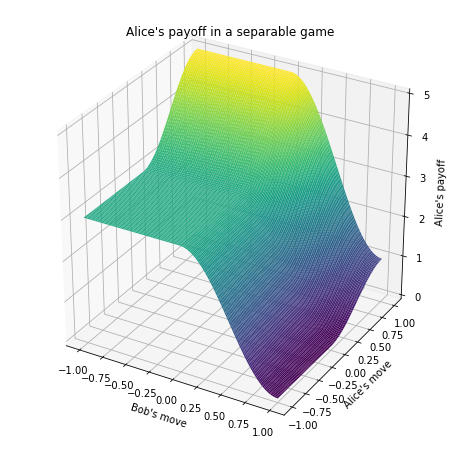

In [5]:
newGame.setJ(0)

z = vectorPlot(x, y)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(y, x, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("Bob's move")
ax.set_ylabel("Alice's move")
ax.set_zlabel("Alice's payoff")
ax.set_title("Alice's payoff in a separable game")

## Figure 3 - Alice's payoff for a maximally entangled game

Text(0.5, 0.92, "Alice's payoff for a maximally entangled game")

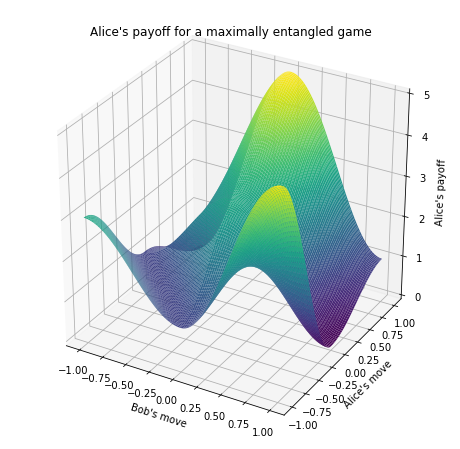

In [6]:
newGame.setJ(pi/2)

z = vectorPlot(x, y)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(y, x, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("Bob's move")
ax.set_ylabel("Alice's move")
ax.set_zlabel("Alice's payoff")
ax.set_title("Alice's payoff for a maximally entangled game")

## Figure 4

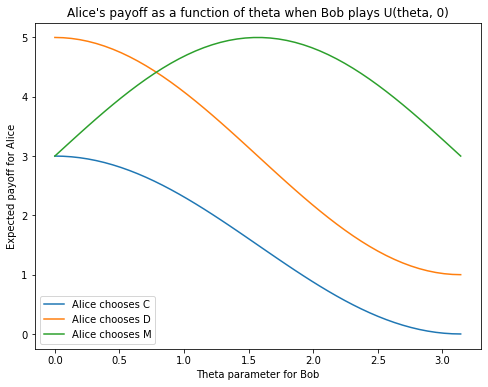

In [7]:
game = PrisonersDilemma()
game.setJ(pi/2)

X = np.linspace(0, pi, 50)
    
def getAliceP(thetaA, phiA, x):
    Alice = np.empty(len(x))
    game.setAliceMove(thetaA, phiA)
    
    for i in range(len(x)):
        theta = X[i]
        game.setBobMove(theta, 0)
        (alice, bob) = game.expectedPayoff()
        Alice[i] = alice
    
    return Alice

# Plotting the graph
plt.figure(figsize=(8,6))
plt.plot(X, getAliceP(0, 0, X), label="Alice chooses C")
plt.plot(X, getAliceP(pi, 0, X), label="Alice chooses D")
plt.plot(X, getAliceP(pi/2, pi/2, X), label="Alice chooses M")
plt.legend()
plt.xlabel("Theta parameter for Bob")
plt.ylabel("Expected payoff for Alice")
plt.title("Alice's payoff as a function of theta when Bob plays U(theta, 0)")
plt.show()